# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from skimage.io import imread
import os
import pandas as pd
import numpy as np

In [0]:
from __future__ import print_function
import os
import shutil
import torch
import torchvision


__Для начала рассмотрим уже выполненную задачу изменения времени года на примере датасеста 'summer2winter-yosemite', содержащего летние и зимние фотографии Йоссмитского парка.__


In [5]:
# !wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be66e78_summer2winter-yosemite/summer2winter-yosemite.zip

--2020-06-12 22:22:35--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be66e78_summer2winter-yosemite/summer2winter-yosemite.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133783376 (128M) [application/zip]
Saving to: ‘summer2winter-yosemite.zip’

summer2winter-yosem 100%[===================>] 127.58M  31.5MB/s    in 4.7s    

2020-06-12 22:22:40 (27.3 MB/s) - ‘summer2winter-yosemite.zip’ saved [133783376/133783376]



In [8]:
ls

drive/  sample_data/  summer2winter_yosemite/  summer2winter-yosemite.zip


In [0]:
# ! mkdir summer2winter_yosemite

In [0]:
# import zipfile
# with zipfile.ZipFile('summer2winter-yosemite.zip', 'r') as zip_ref:
#     zip_ref.extractall('summer2winter_yosemite')

In [0]:
summer = []
winter = []
test_summer = []
test_winter = []
from skimage.io import imread
import os
root = 'summer2winter_yosemite/summer2winter_yosemite'
summer_dir = root + '/summer/summer/'
test_summer_dir  = root + '/test_summer/summer/'
winter_dir = root + '/winter/winter/'
test_winter_dir  = root + '/test_winter/winter/'


for files in os.walk(winter_dir):
  for curr_file in files[2]:
    winter.append(imread(winter_dir + curr_file))


for files in os.walk(summer_dir):
  for curr_file in files[2]:
    summer.append(imread(summer_dir + curr_file))


for files in os.walk(test_summer_dir):
  for curr_file in files[2]:
    test_summer.append(imread(test_summer_dir + curr_file))

for files in os.walk(test_winter_dir):
  for curr_file in files[2]:
    test_winter.append(imread(test_winter_dir + curr_file))

In [0]:
from skimage.transform import resize
size = (256, 256)
limit_train = 2000
limit_test = 1000
X_train = [resize(x, size, mode='constant', anti_aliasing=True,) for x in summer[:limit_train]]
X_test = [resize(x, size, mode='constant', anti_aliasing=True,) for x in test_summer[:limit_test]]
Y_train = [resize(x, size, mode='constant', anti_aliasing=True,) for x in winter[:limit_train]]
Y_test = [resize(x, size, mode='constant', anti_aliasing=True,) for x in test_winter[:limit_test]]

In [0]:
import numpy as np
X_train = np.array(X_train, np.float32)
X_test = np.array(X_test, np.float32)
Y_train = np.array(Y_train, np.float32)
Y_test = np.array(Y_test, np.float32)

In [12]:
len(X_train)

1231

__Визуализируем данные__

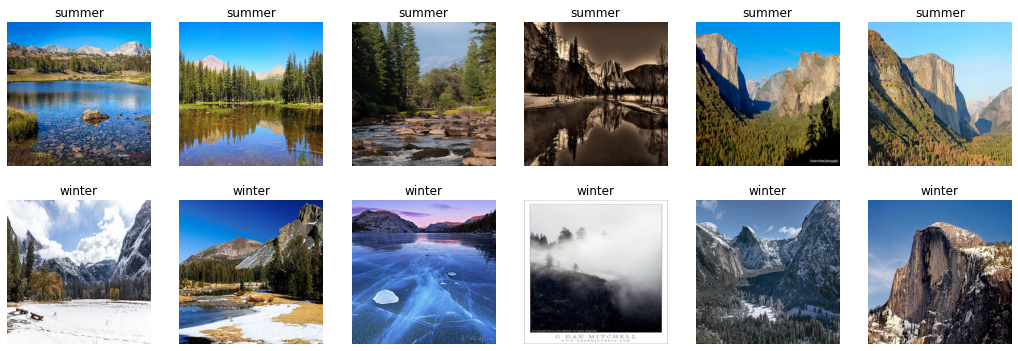

In [13]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.title('summer')
    plt.imshow(X_train[i])

for i in range(6):
    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.title('winter')
    plt.imshow(Y_train[i])
plt.show();

In [0]:
from torch.utils.data import DataLoader
batch_size = 10 #изначально было 25
data_x_tr = DataLoader(list(np.rollaxis(X_train, 3, 1)), 
                     batch_size=batch_size, shuffle=True)
data_x_ts = DataLoader(list(np.rollaxis(X_test, 3, 1)), 
                     batch_size=batch_size, shuffle=True)
data_y_tr = DataLoader(list(np.rollaxis(Y_train, 3, 1)), 
                     batch_size=batch_size, shuffle=True)
data_y_ts = DataLoader(list(np.rollaxis(Y_test, 3, 1)), 
                     batch_size=batch_size, shuffle=True)

In [17]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time
from sklearn.preprocessing import scale

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

__Создадим дискриминатор картинок. Рассмотрим несколько возможных моделей.__


1) Полносвязная нейронная сеть. Вариант наиболее простой, однако для данной модели такой дискриминатор оказывается слишком слабым. Нужно добавить свёрточные слои. 

In [0]:
# class Discriminator(nn.Module):
    
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.l1 = nn.Sequential(
#             nn.Linear(256*256*3,256*3),
#             nn.ReLU()
#         )
#         self.l2 = nn.Sequential(
#             nn.Linear(256*3,25),
#             nn.ReLU()
#         )
#         self.l3 = nn.Sequential(
#             nn.Linear(25,1),
#             nn.Sigmoid()
#         )

#     def forward(self,x):
#         x = x.view(x.size(0), -1)
#         x = self.l1(x)
#         x = self.l2(x)
#         x = self.l3(x)
#         return x



2) Дискриминатор, снованный на блоке delated свёрток. Результат лучше, чем для линейного классификатора, однако качество всё ещё неприемлимое. Вероятно проблема в том, что имеется большое различие межд признаковыми картами для генератора и дискриминатора.

In [0]:
# class Discriminator(nn.Module):
    
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.bottleneck_conv0 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 3, dilation = 1, padding=1),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
#         self.bottleneck_conv1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 3, dilation = 1, padding=1),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
#         self.bottleneck_conv2 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 3, dilation = 2, padding=2),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
#         self.bottleneck_conv3 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 3, dilation = 4, padding=4),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
#         self.bottleneck_conv4 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 3, dilation = 8, padding=8),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
#         self.bottleneck_conv5 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 3, dilation = 16, padding=16),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
#         self.bottleneck_conv6 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 3, dilation = 1, padding=1),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
#         self.bottleneck_conv7 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=3, kernel_size = 1, dilation = 1),
#             nn.BatchNorm2d(num_features = 3),
#             nn.ReLU(),
#         )
 
#         # self.out = nn.Linear(32, 1)
#         self.out1 = nn.Sequential(
#             nn.Linear(3 * 256 * 256, 256),
#             nn.BatchNorm1d(256),
#             nn.ReLU()
#         )
#         self.out2 = nn.Sequential(
#             nn.Linear(256,1),
#             nn.Sigmoid()
#         )



#     def forward(self, x):
#         x = self.bottleneck_conv0(x)
#         x = self.bottleneck_conv1(x)
#         x = self.bottleneck_conv2(x)
#         x = self.bottleneck_conv3(x)
#         x = self.bottleneck_conv4(x)
#         x = self.bottleneck_conv5(x)
#         x = self.bottleneck_conv6(x)
#         x = self.bottleneck_conv7(x)

#         x = x.view(x.size(0), -1)
#         x = self.out1(x)
#         x = self.out2(x)

#         return x

3) Дискриминатор, в основе которого лежит энкодер SegNet (количество свёрточный слоёв сокращено для экономии места на GPU). В первом и последнем слоях отсутствует нормализация, что помогает бороться с проблемой затухания градиента. В тех же целях в последнем слое используется активация tanh (sigmoida перестаёт адекватно учиться на большом количестве эпох; Скорее всего это происходит именно из-за затухания градиента). 

In [0]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size = 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) #256 --> 128
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  #128 --> 64
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  #64 --> 32
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=1, kernel_size = 4, padding=1),
             nn.Tanh(),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        return x

__Построим Генератор:__

1) Генератор основанный на архитектуре Net. В сегментации лучше всего проявила себя UNet. Однако в данной задаче такой генератор плохо справлялся с восстановлением цветов. Возможно проблема была в наложении цветов картинки с первых слоёв и вытекающими из этого пробламами.

In [0]:
# class Generator(nn.Module):
#     def __init__(self):
#         super(Generator, self).__init__()

#         # encoder (downsampling)
#         self.enc_conv0 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=64, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 64),
#             nn.ReLU(),
#             # nn.Conv2d(in_channels=64, out_channels=64, kernel_size = 3, padding=1),
#             # nn.BatchNorm2d(num_features = 64),
#             # nn.ReLU(),
#             )
#         self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2 )# 256 -> 128
#         self.enc_conv1 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 128),
#             nn.ReLU(),
#             # nn.Conv2d(in_channels=128, out_channels=128, kernel_size = 3, padding=1),
#             # nn.BatchNorm2d(num_features = 128),
#             # nn.ReLU(),
#             )
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # 128 -> 64
#         self.enc_conv2 = nn.Sequential(
#             nn.Conv2d(in_channels=128, out_channels=256, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 256),
#             nn.ReLU(),
#             # nn.Conv2d(in_channels=256, out_channels=256, kernel_size = 3, padding=1),
#             # nn.BatchNorm2d(num_features = 256),
#             # nn.ReLU(),
#             ) 
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 64 -> 32
#         # self.enc_conv3 = nn.Sequential(
#         #     nn.Conv2d(in_channels=256, out_channels=512, kernel_size = 3, padding=1),
#         #     nn.BatchNorm2d(num_features = 512),
#         #     nn.ReLU(),
#         #     # nn.Conv2d(in_channels=512, out_channels=512, kernel_size = 3, padding=1),
#         #     # nn.BatchNorm2d(num_features = 512),
#         #     # nn.ReLU(),
#         #     ) 
#         # self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # 32 -> 16


#         self.bottleneck_conv = nn.Sequential(
            
#             nn.Conv2d(in_channels=256, out_channels=256, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 256),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=256, out_channels=256, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 256),
#             nn.ReLU(),

#         )

#         # # decoder (upsampling)
#         # self.upsample0 =  nn.Upsample(scale_factor=2,mode='bilinear')  # 16 -> 32
#         # self.dec_conv0 = nn.Sequential(
#         #     nn.Conv2d(in_channels=1024, out_channels=512, kernel_size = 3, padding=1),
#         #     nn.BatchNorm2d(num_features = 512),
#         #     nn.ReLU(),
#         #     nn.Conv2d(in_channels=512, out_channels=256, kernel_size = 3, padding=1),
#         #     nn.BatchNorm2d(num_features = 256),
#         #     nn.ReLU(),
#         # )
#         self.upsample1 =  nn.Upsample(scale_factor=2,mode='bilinear') # 32 -> 64
#         self.dec_conv1 = nn.Sequential(
#             nn.Conv2d(in_channels=512, out_channels=256, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 256),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=256, out_channels=128, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 128),
#             nn.ReLU(),
#         )
#         self.upsample2 =  nn.Upsample(scale_factor=2,mode='bilinear')  # 64 -> 128
#         self.dec_conv2 = nn.Sequential(
#             nn.Conv2d(in_channels=256, out_channels=128, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 128),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=128, out_channels=64, kernel_size = 3, padding=1),
#             nn.BatchNorm2d(num_features = 64),
#             nn.ReLU(),
#         )
#         self.upsample3 =  nn.Upsample(scale_factor=2,mode='bilinear') # 128 -> 256
#         self.dec_conv3 =nn.Sequential(
#             nn.Conv2d(in_channels=128, out_channels=64, kernel_size = 3, padding=1),
#             # nn.BatchNorm2d(num_features = 64),
#             nn.ReLU(),
#             # nn.Conv2d(in_channels=64, out_channels=64, kernel_size = 3, padding=1),
#             # nn.BatchNorm2d(num_features = 64),
#             # nn.ReLU(),
#             nn.Conv2d(in_channels=64, out_channels=3, kernel_size = 3, padding=1),
#             nn.Tanh()
#             #nn.Sigmoid(),
#         )

#     def forward(self, x):
#         # encoder
#         e0 = self.pool0(self.enc_conv0(x))
#         e1 = self.pool1(self.enc_conv1(e0))
#         e2 = self.pool2(self.enc_conv2(e1))
#         # e3 = self.pool3(self.enc_conv3(e2))

#         # bottleneck
#         b = self.bottleneck_conv(e2)



#         # decoder

#         # d0 = self.dec_conv0(self.upsample0(torch.cat((b,e3),dim = 1)))
#         d1 = self.dec_conv1(self.upsample1(torch.cat((b,e2),dim = 1)))
#         d2 = self.dec_conv2(self.upsample2(torch.cat((d1,e1),dim = 1)))
#         d3 = self.dec_conv3(self.upsample3(torch.cat((d2,e0),dim = 1)))# no activation



#         return d3

2) Генератор основанный на SegNet. Колиество свёрточных слоёв сокращено для экономии места на GPU. Причём слои энкодера совпадают с дискриминатором, что позволяет моделям лучше взаимодействовать, работая с одинаковыми признаковыми картами.

Комбинация таких генератора и дискриминатора показала хороший результат.

In [0]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()


        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 64),
            nn.ReLU(),
            )
        self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2,return_indices = True )# 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 128),
            nn.ReLU(),
            )
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2,return_indices = True)  # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 256),
            nn.ReLU(),
            ) 
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2,return_indices = True) # 64 -> 32

        
        # decoder (upsampling)
        self.upsample1 =  nn.MaxUnpool2d(kernel_size=2, stride=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 128),
            nn.ReLU(),
        )
        self.upsample2 =  nn.MaxUnpool2d(kernel_size=2, stride=2)  # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size = 3, padding=1),
            nn.BatchNorm2d(num_features = 64),
            nn.ReLU(),
        )
        self.upsample3 =  nn.MaxUnpool2d(kernel_size=2, stride=2) # 128 -> 256
        self.dec_conv3 =nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size = 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=3, kernel_size = 3, padding=1),
            nn.Tanh()
        )
        

    def forward(self, x):
        # encoder
        e0,ind0 = self.pool0(self.enc_conv0(x))
        e1,ind1 = self.pool1(self.enc_conv1(e0))
        e2,ind2 = self.pool2(self.enc_conv2(e1))

        # bottleneck


        # decoder
        d1 = self.dec_conv1(self.upsample1(e2,ind2))
        d2 = self.dec_conv2(self.upsample2(d1,ind1))
        d3 = self.dec_conv3(self.upsample3(d2,ind0))



        return d3

__Зададим функции потерь:__

In [0]:
# Для тренировки дискриминаторов используем среднеквадратичную ошибку.
# удобно ввести две функции потерь для дискриминаторов. Для определения настоящих картинок (y_pred должно  1)
def real_mse_loss(y_pred):
  return torch.mean(y_pred**2)
def fake_mse_loss(y_pred):
  return torch.mean((1 - y_pred)**2)
def cycle_consistency_loss(real_im, reconstructed_im, lambda_weight):
  loss = torch.mean(torch.abs(real_im - reconstructed_im))
  return loss*lambda_weight

функция для сохранения весов модели и отимизаторов в процессе тренировки:

In [0]:
def checkpoint(epoch, G_XtoY, G_YtoX, D_X, D_Y, d_x_loss, d_y_loss, g_total_loss, g_optimizer, d_x_optimizer, d_y_optimizer):
  torch.save({'epoch': epoch,
              'G_XtoY_state_dict': G_XtoY.state_dict(),
              'G_YtoX_state_dict': G_YtoX.state_dict(),
              'D_Y_state_dict': D_Y.state_dict(),
              'D_X_state_dict': D_X.state_dict(),
              'g_optimizer_state_dict': g_optimizer.state_dict(),
              'd_x_optimizer_state_dict': d_x_optimizer.state_dict(),
              'd_y_optimizer_state_dict': d_y_optimizer.state_dict(),
              'd_x_loss': d_x_loss,
              'd_y_loss': d_y_loss,
              'g_total_loss': g_total_loss,
              }, 'drive/My Drive/Colab Notebooks/weights/model')

In [0]:
def training_loop(dataloader_X, dataloader_Y, test_dataloader_X, test_dataloader_Y, 
                  n_epochs=1000):
    
    print_every=10 # каждую 10-ю эпоху визуализируем результаты генераторов на тесте и выводим значения лоссов
    losses = []

    test_iter_X = iter(test_dataloader_X)
    test_iter_Y = iter(test_dataloader_Y)

    # зафиксируем данные для для виуализации качества
    fixed_X = test_iter_X.next()[:2]
    fixed_Y = test_iter_Y.next()[:2]

    # батчи для каждой эпохи обучения
    iter_X = iter(dataloader_X)
    iter_Y = iter(dataloader_Y)
    batches_per_epoch = min(len(iter_X), len(iter_Y))

    for epoch in range(1, n_epochs+1):
        print(str(epoch)+'/'+str(n_epochs+1))

        # Обнуляем генераторы для каждой эпохи
        if epoch % batches_per_epoch == 0:
            iter_X = iter(dataloader_X)
            iter_Y = iter(dataloader_Y)

        images_X = iter_X.next()
        images_Y = iter_Y.next()
        
        # закинем на GPU
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        images_X = images_X.to(device)
        images_Y = images_Y.to(device)

        #ТРЕНИРУЕМ ДИСКРИМИНАТОРЫ

        # Cначала посчитаем потери 1-го дискриминатора на реальных данных,
        # потом на сгенерированных и просуммировав получим общие потери.
        d_x_optimizer.zero_grad()
        real_D_loss = real_mse_loss(D_X(images_X))
        fake_D_loss = fake_mse_loss(D_X(G_YtoX(images_Y)))
        d_x_loss = real_D_loss + fake_D_loss
        d_x_loss.backward()
        d_x_optimizer.step()
        
        # Аналогично для второго дискриминатора
        d_y_optimizer.zero_grad()
        real_D_y_loss = real_mse_loss(D_Y(images_Y))
        fake_D_y_loss = fake_mse_loss(D_Y(G_XtoY(images_X)))
        d_y_loss = real_D_y_loss + fake_D_y_loss
        d_y_loss.backward()
        d_y_optimizer.step()

        # ТРЕНИРУЕМ ГЕНИРАТОРЫ

        ##   Сгенерируем Картинки из домена X из картинок из домена Y
        ##   Посчитаем потери на дискриминаторе, записав их как настоящие данные 
        ##   (таким образом оценим качество генерации, а не классификации)

        ##   Далее сгенерируем из них обратно картинки домена X
        ##   Посчитаем потери цикла (коэффициент lambda_weight варьируется в зависимости от задачи,
        ##   чем больше его значение, тес больший вклад вносят потери цикла в общую функцию потерь)

        g_optimizer.zero_grad()
        out_1 = G_YtoX(images_Y)
        loss_1 = real_mse_loss(D_X(out_1))
        out_2 = G_XtoY(out_1)
        loss_2 = cycle_consistency_loss(real_im = images_Y, reconstructed_im = out_2, lambda_weight=10)

        ##  Аналогично для перевода из Y в X
        out_3 = G_XtoY(images_X)
        loss_3 = real_mse_loss(D_Y(out_3))
        out_4 = G_YtoX(out_3)
        loss_4 =  cycle_consistency_loss(real_im = images_X, reconstructed_im = out_4, lambda_weight=10)

        # Итоговые потери генератора
        g_total_loss = loss_1 + loss_2 + loss_3 + loss_4
        g_total_loss.backward()
        g_optimizer.step()
        
        # Выведем текущее лоссы на трейне
        if epoch % print_every == 0:
            losses.append((d_x_loss.item(), d_y_loss.item(), g_total_loss.item()))
            print('Epoch [{:5d}/{:5d}] | d_X_loss: {:6.4f} | d_Y_loss: {:6.4f} | g_total_loss: {:6.4f}'.format(
                    epoch, n_epochs, d_x_loss.item(), d_y_loss.item(), g_total_loss.item()))


        # Визуализируем текущее качество на тестовой выборке
        if epoch % print_every == 0:
            G_YtoX.eval()
            G_XtoY.eval()
            X_real = fixed_X.to(device)
            Y_real = fixed_Y.to(device)
            X_transformed = G_YtoX(Y_real)
            Y_transformed = G_XtoY(X_real)

            X_real = X_real.cpu()
            Y_real = Y_real.cpu()
            X_transformed = X_transformed.detach().cpu()
            Y_transformed = Y_transformed.detach().cpu()
        
            clear_output(wait=True)
            plt.figure(figsize=(12, 16))
            for k in range(2):
              plt.subplot(4, 2, k+1)
              plt.imshow((np.rollaxis(X_real[k].numpy(), 0, 3)* 255).astype(np.uint8))
              plt.title('Real X')
              plt.axis('off')

              plt.subplot(4, 2, k+3)
              plt.imshow((np.rollaxis(Y_transformed[k].numpy(), 0, 3)* 255).astype(np.uint8))
              plt.title('Transformed to Y')
              plt.axis('off')

              plt.subplot(4, 2, k+5)
              plt.imshow((np.rollaxis(Y_real[k].numpy(), 0, 3)* 255).astype(np.uint8))
              plt.title('Real Y')
              plt.axis('off')

              plt.subplot(4, 2, k+7)
              plt.imshow((np.rollaxis(X_transformed[k].numpy(), 0, 3)* 255).astype(np.uint8))
              plt.title('Transformed to X')
              plt.axis('off')

            plt.suptitle('Epoch [{:5d}/{:5d}] | d_X_loss: {:6.4f} | d_Y_loss: {:6.4f} | g_total_loss: {:6.4f}'.format(epoch, n_epochs, d_x_loss.item(), d_y_loss.item(), g_total_loss.item()))
            plt.show();
            G_YtoX.train()
            G_XtoY.train()

         #сохраняем модель:
        checkpoint_every=1000
        if epoch % checkpoint_every == 0:
            checkpoint(epoch, G_XtoY, G_YtoX, D_X, D_Y, d_x_loss, d_y_loss, g_total_loss, g_optimizer, d_x_optimizer, d_y_optimizer)

    return losses

In [0]:
G_XtoY = Generator().to(device)
G_YtoX = Generator().to(device)

D_Y = Discriminator().to(device)
D_X = Discriminator().to(device)

In [0]:
# Гиперпараметры из оригинальной статьи
lr = 0.00002
beta1 = 0.5
beta2 = 0.999

g_params = list(G_XtoY.parameters()) + list(G_YtoX.parameters())

g_optimizer = optim.Adam(g_params, lr, [beta1, beta2])
d_x_optimizer = optim.Adam(D_X.parameters(), lr, [beta1, beta2])
d_y_optimizer = optim.Adam(D_Y.parameters(), lr, [beta1, beta2])

Запустим Обучение:

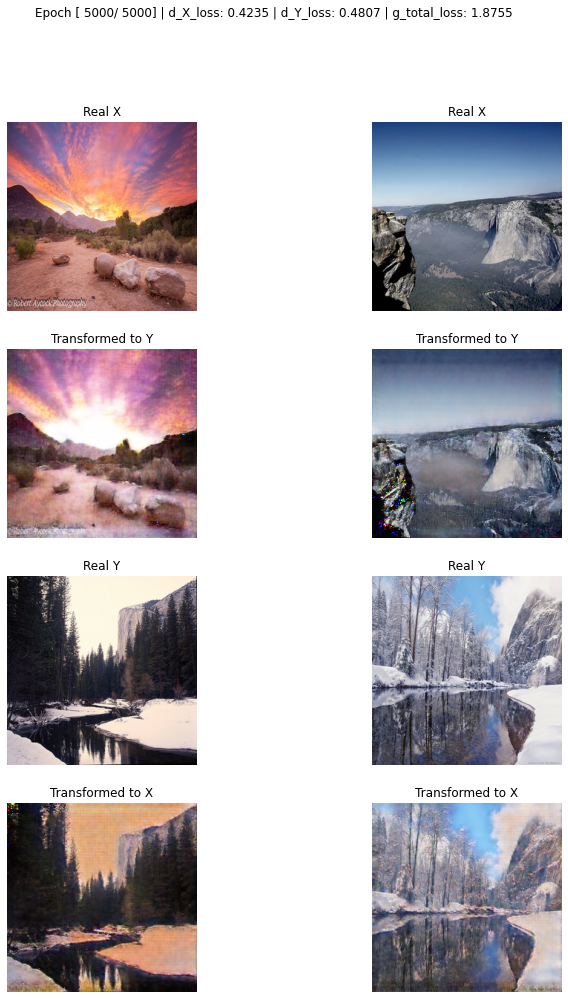

In [31]:
loss_history = []
loss_history = training_loop(data_x_tr, data_y_tr, data_x_ts, data_y_ts, 
                  n_epochs=5000)

Приведём историю функции потерь в процессе тренировки к нормальному виду и сохраним результаты на диск.

In [0]:
df = pd.DataFrame()

In [0]:
l_x = []
l_y = []
l_g = []
for i in range(len(loss_history)):
  l_x.append(loss_history[i][0])
  l_y.append(loss_history[i][1])
  l_g.append(loss_history[i][2])     

In [34]:
len(l_g)

500

In [0]:
df['loss_D_x'] = l_x
df['loss_D_y'] = l_y
df['loss_G'] = l_g

In [0]:
# df.to_csv('drive/My Drive/Colab Notebooks/weights/losses.csv')

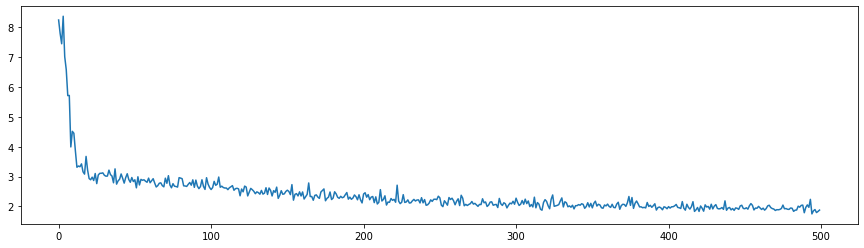

In [37]:
plt.plot(df['loss_G'])

На графике всего 500 точек, так как сохранения происходили на каждой 10-й эпохе. Видно, что функция потерь для генираторов, как и ожидалось, монотонно убывает ( за исключением некоторых флуктуаций).

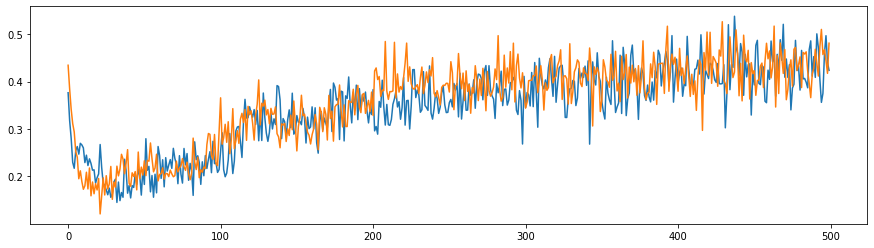

In [38]:
plt.plot(df[['loss_D_x','loss_D_y']])

Потери дискриминатора имеют совершенно другую зависимость. Это связано с тем, что тренировка дискриминатора не является нашей целью. Дискриминаторы присутствуют лишь для обучения генираторов, поэтому такая картина нас устраивает.

In [30]:
# import gc
# del G_XtoY, G_YtoX, D_X, D_Y, g_optimizer, d_x_optimizer, d_y_optimizer
# torch.cuda.empty_cache()
# gc.collect()

23421

In [0]:
# model = Generator().to(device)
# max_epochs = 100
# optimizer = torch.optim.Adam(list(model.parameters()), lr=0.0001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, 20, gamma=0.5)
# train(model,  optimizer, loss, max_epochs, data_tr, data_val)
# # train(model, optimizer, bce_loss, max_epochs, data_tr, data_val)

__Проверим работу обученных генираторов__



Фрагмент загрузки предобученных генираторов:



---



In [0]:
# G_XtoY = Generator()
# G_YtoX = Generator()

In [32]:
# state = torch.load('drive/My Drive/Colab Notebooks/weights/model')
# G_XtoY.load_state_dict(state['G_XtoY_state_dict'])
# G_YtoX.load_state_dict(state['G_YtoX_state_dict'])

<All keys matched successfully>

In [0]:
# G_XtoY = G_XtoY.to(device)
# G_YtoX = G_YtoX.to(device)



---



---



In [0]:
X_test = X_test.numpy()
Y_test = Y_test.numpy()

In [0]:
X_test = torch.tensor(np.rollaxis(X_test, 3, 1))
Y_test = torch.tensor(np.rollaxis(Y_test, 3, 1))

In [0]:
X_real = []
X_pred = []
for i in range(round(len(X_test)/10)-1):
  X_t = iter(data_x_ts).next()
  X_to_Y = G_XtoY(X_t.to(device))
  X_to_Y = X_to_Y.detach().cpu()
  X_t = X_t.cpu()
  X_real.append(X_t)
  X_pred.append(X_to_Y)

In [0]:
Y_real = []
Y_pred = []
for i in range(round(len(Y_test)/10)-1):
  Y_t = iter(data_y_ts).next()
  Y_to_X = G_YtoX(Y_t.to(device))
  Y_to_X = Y_to_X.detach().cpu()
  Y_t = Y_t.cpu()
  Y_real.append(Y_t)
  Y_pred.append(Y_to_X)

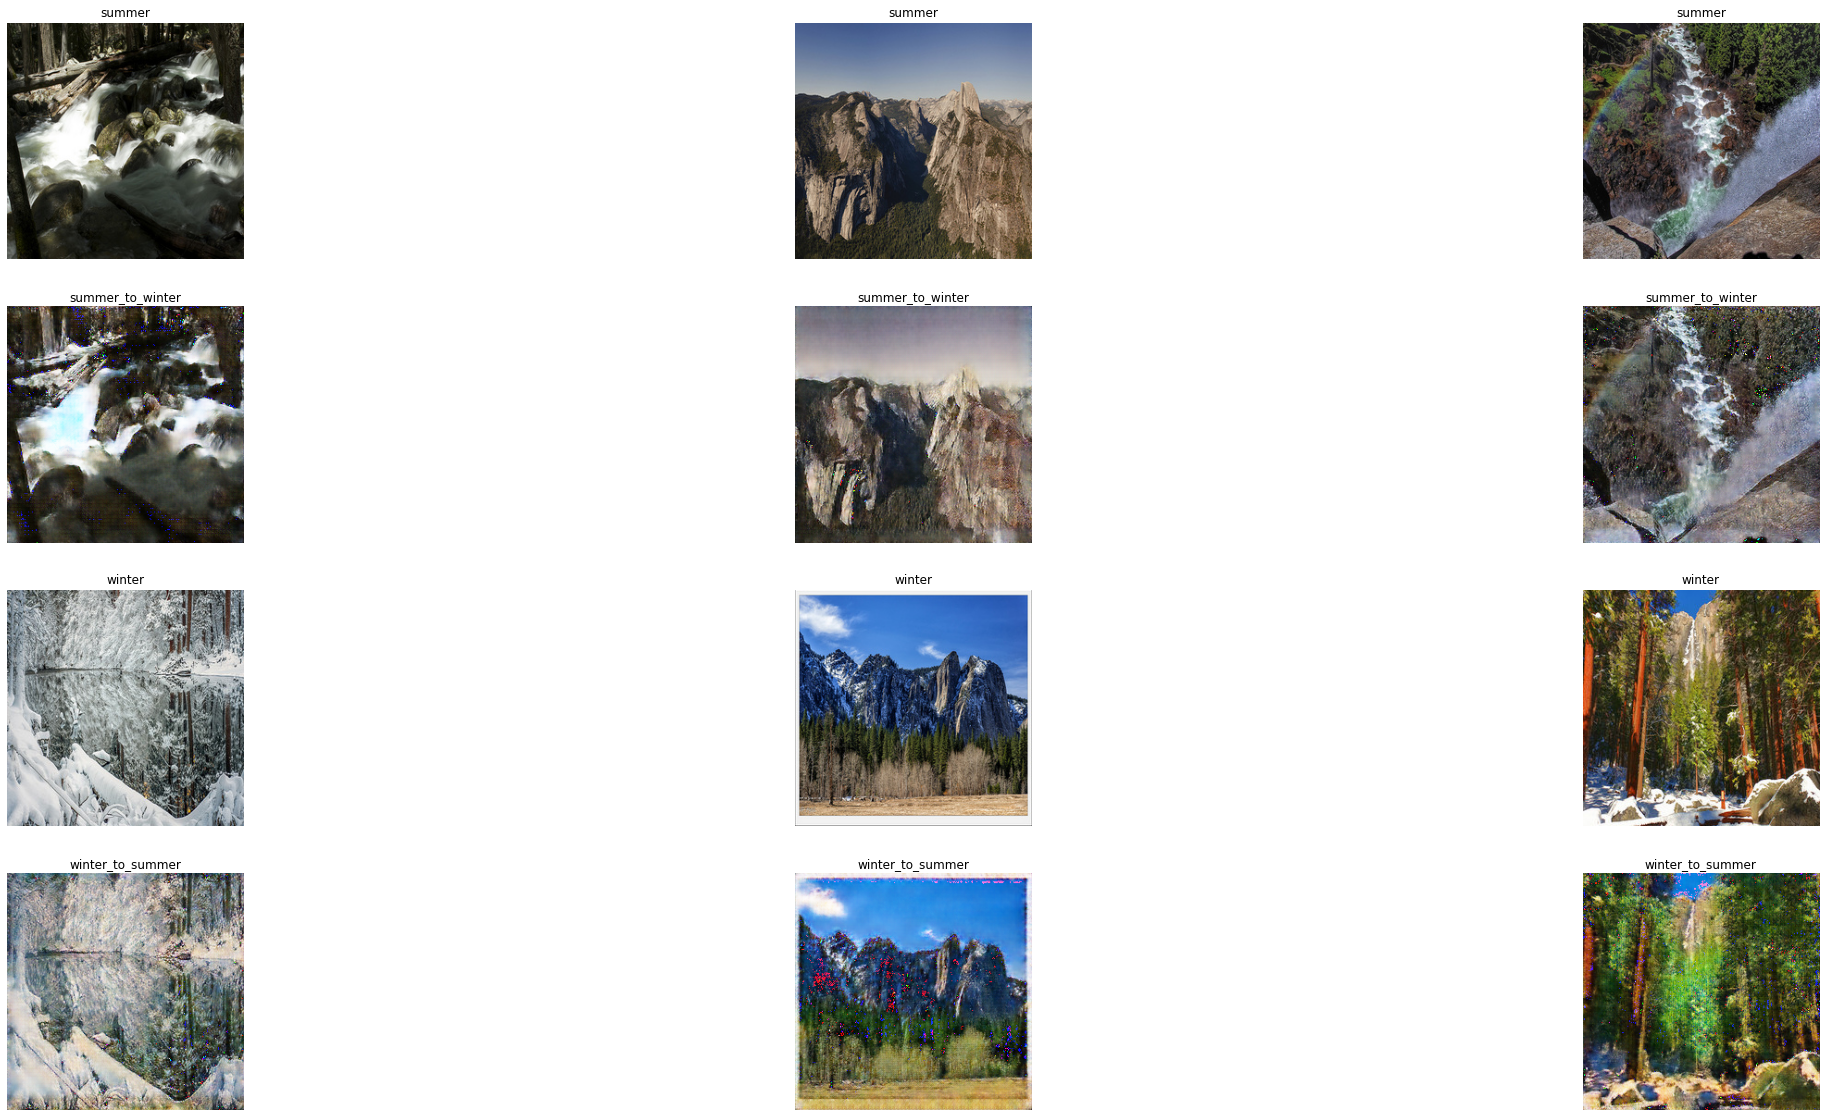

In [53]:
plt.figure(figsize=(40, 20))
k = 15
m = 0
X = X_real[k]
X_to_Y = X_pred[k]
Y = Y_real[k]
Y_to_X = Y_pred[k]
for i in range(3):
    plt.subplot(4, 3, i+1)
    plt.axis("off")
    plt.title('summer')
    plt.imshow((np.rollaxis(X[i+m].numpy(), 0, 3)* 255).astype(np.uint8))

    plt.subplot(4, 3, i+4)
    plt.axis("off")
    plt.title('summer_to_winter')
    plt.imshow((np.rollaxis(X_to_Y[i+m].numpy(), 0, 3)* 255).astype(np.uint8))

    plt.subplot(4, 3, i+7)
    plt.axis("off")
    plt.title('winter')
    plt.imshow((np.rollaxis(Y[i+m].numpy(), 0, 3)* 255).astype(np.uint8))

    plt.subplot(4, 3, i+10)
    plt.axis("off")
    plt.title('winter_to_summer')
    plt.imshow((np.rollaxis(Y_to_X[i+m].numpy(), 0, 3)* 255).astype(np.uint8))
plt.show();

Как видно из представленных картинок, модель весьма неплохо справляется со своей задачей. Но при этом есть и видимые недочёты:
1) На некоторых картинках имеются артефакты в виде ярких точечных пикселей.
2) Некоторые картинки не поддаютсе обработке. Например, возникают сложности с трансформацией сильно заснеженнных картинок.
(2-я проблема так же отечена и для оригинальной статьи)